# Рейсы в США с Pandas, Matplotlib и Seaborn

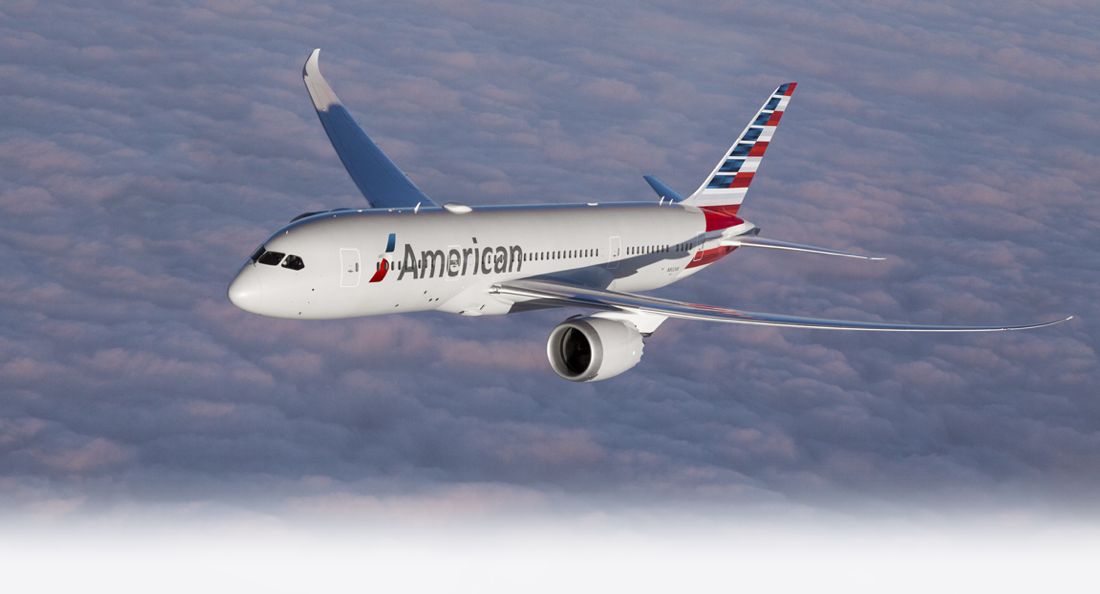

### Ваша задача:
- написать код и выполнить вычисления в ячейках ниже (там где будут вопросы)

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%config InlineBackend.figure_format = 'retina'

* Скачать данные [архив](https://drive.google.com/file/d/1lGEDDVgD8QYMf9Fio_NG6jBWOF4Ttr7e/view?usp=sharing) (В архиве ~ 111 Мб, в разархивированном виде – ~ 690 Мб). Не нужно распаковывать — Pandas может сам это сделать.
* Поместите его в папку там где лежит ваш Jupyter.
* Набор данных содержит информацию о перевозчиках и рейсах между аэропортами США в течение 2008 года.
* Описание столбцов доступно [здесь] (https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ). Посетите этот сайт, чтобы найти значение кодов отмены рейса. И в целом лучше понимать что за данные у нас есть.

Рассмотрим следующие термины, которые мы используем:
* уникальный рейс – запись (строка) в наборе данных
* завершенный рейс – рейс, который не отменен (Cancelled==0 в наборе данных)
* код рейса – комбинация ['UniqueCarrier','FlightNum'], т.е. UA52
* код аэропорта – трехбуквенный псевдоним аэропорта из столбцов «Origin» или «Dest».

**Чтение данных и создание объекта Pandas ``DataFrame``**

(Это может занять некоторое время, будьте терпеливы)

Мы не собираемся читать весь набор данных. Чтобы уменьшить объем памяти, мы вместо этого загружаем только необходимые столбцы и приводим их к подходящим типам данных.

In [120]:
dtype = {
    "DayOfWeek": np.uint8,
    "DayofMonth": np.uint8,
    "Month": np.uint8,
    "Cancelled": np.uint8,
    "Year": np.uint16,
    "FlightNum": np.uint16,
    "Distance": np.uint16,
    "UniqueCarrier": str,
    "CancellationCode": str,
    "Origin": str,
    "Dest": str,
    "ArrDelay": np.float64,
    "DepDelay": np.float64,
    "CarrierDelay": np.float64,
    "WeatherDelay": np.float64,
    "NASDelay": np.float64,
    "SecurityDelay": np.float64,
    "LateAircraftDelay": np.float64,
    "DepTime": np.float64,
}

In [121]:
flights_df = pd.read_csv("flights_2008.csv.bz2", usecols=dtype.keys(), dtype=dtype)

**Проверьте количество строк и столбцов и распечатайте имена столбцов.**

In [88]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Распечатайте первые 5 строк набора данных.**

In [122]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


**Изучите типы данных всех столбцов.**

In [9]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               uint16 
 1   Month              uint8  
 2   DayofMonth         uint8  
 3   DayOfWeek          uint8  
 4   DepTime            float64
 5   UniqueCarrier      object 
 6   FlightNum          uint16 
 7   ArrDelay           float64
 8   DepDelay           float64
 9   Origin             object 
 10  Dest               object 
 11  Distance           uint16 
 12  Cancelled          uint8  
 13  CancellationCode   object 
 14  CarrierDelay       float64
 15  WeatherDelay       float64
 16  NASDelay           float64
 17  SecurityDelay      float64
 18  LateAircraftDelay  float64
dtypes: float64(8), object(4), uint16(3), uint8(4)
memory usage: 708.6+ MB


**Получите базовую статистику по каждому столбцу.**

In [10]:
flights_df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,FlightNum,ArrDelay,DepDelay,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.855029e+06,6.873482e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,2.224200e+03,8.168452e+00,9.972570e+00,7.263870e+02,1.960618e-02,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,1.961716e+03,3.850194e+01,3.531127e+01,5.621018e+02,1.386426e-01,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-5.190000e+02,-5.340000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,6.220000e+02,-1.000000e+01,-4.000000e+00,3.250000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.571000e+03,-2.000000e+00,-1.000000e+00,5.810000e+02,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,3.518000e+03,1.200000e+01,8.000000e+00,9.540000e+02,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,9.743000e+03,2.461000e+03,2.467000e+03,4.962000e+03,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


**Подсчитайте уникальных перевозчиков и определите их относительную долю рейсов:**

In [11]:
flights_df["UniqueCarrier"].nunique()

20

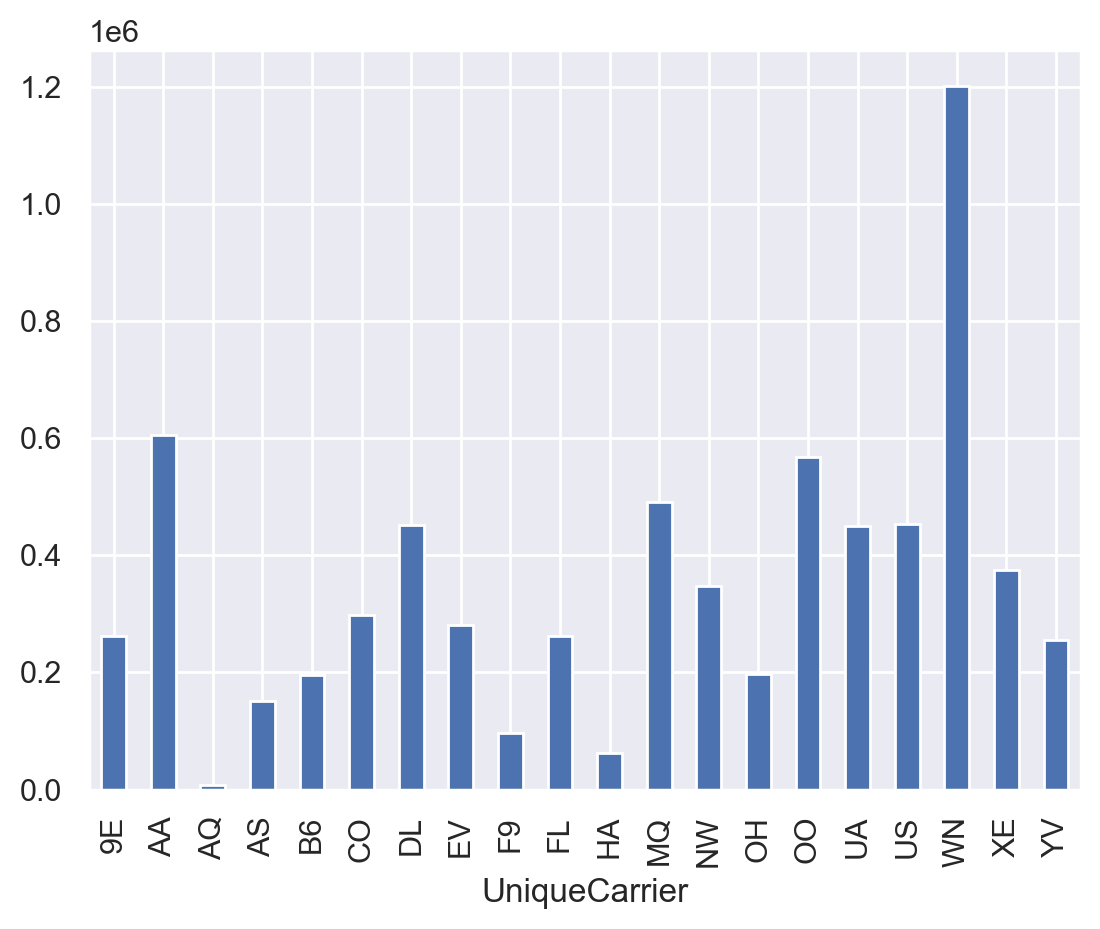

In [12]:
# Количество рейсов по перевозчикам 
flights_df.groupby("UniqueCarrier").size().plot(kind="bar");

**Мы также можем группировать по категориям, чтобы рассчитывать различные агрегированные статистические данные.**

**Например, поиск топ-3 кодов рейсов с наибольшим общим расстоянием, пройденным в 2008 году.**

In [7]:
flights_df.groupby(["UniqueCarrier", "FlightNum"])["Distance"].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244
               14           1796244
UA             52           1789722
Name: Distance, dtype: uint64

**Другой способ:**

In [8]:
flights_df.groupby(["UniqueCarrier", "FlightNum"]).agg({"Distance": [np.mean, np.sum, "count"], "Cancelled": np.sum}
                                                      ).sort_values(("Distance", "sum"), ascending=False).iloc[0:3]

Distance                Cancelled
                                mean      sum count       sum
UniqueCarrier FlightNum                                      
CO            15         4962.000000  1796244   362         0
              14         4962.000000  1796244   362         0
UA            52         2465.181818  1789722   726         8

**Количество рейсов по дням недели и месяцам:**

In [15]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**Гистограмма дальности полета:**

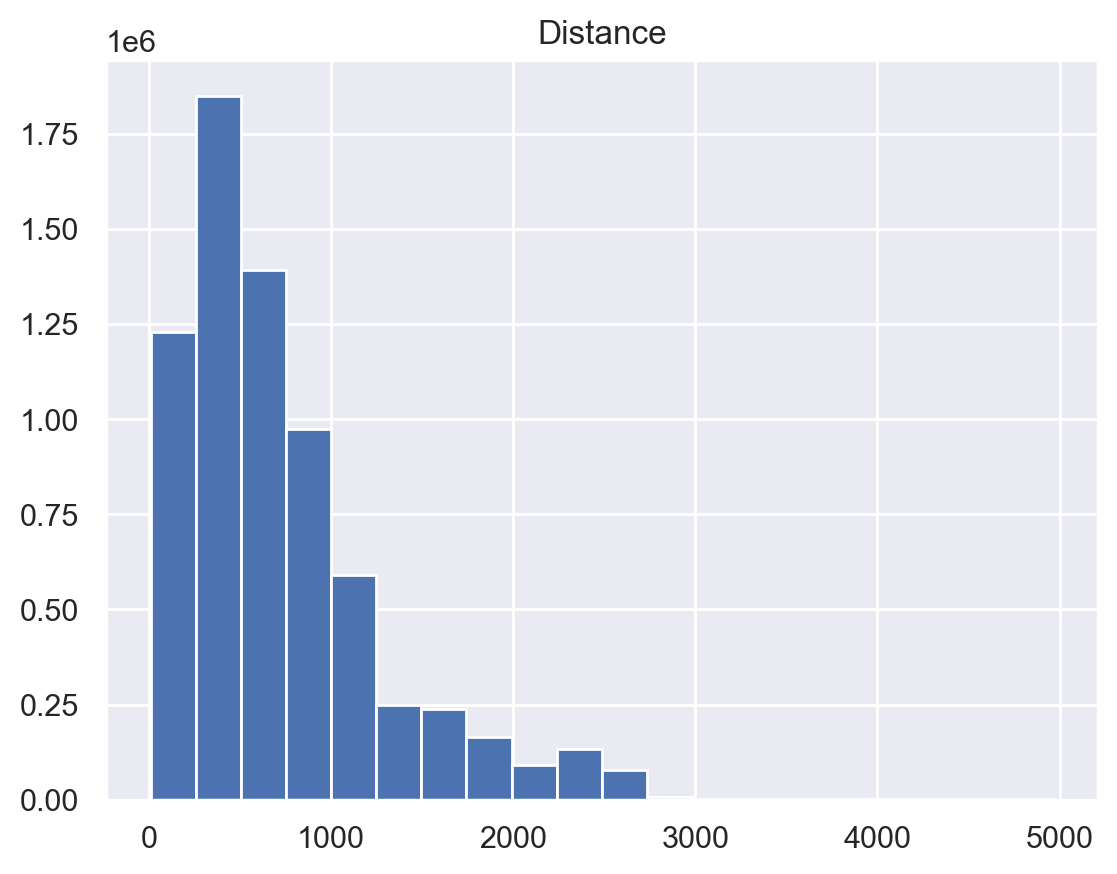

In [16]:
flights_df.hist("Distance", bins=20);

**Составление гистограммы частоты рейсов по дате.**

In [123]:
flights_df["Date"] = pd.to_datetime(
    flights_df.rename(columns={"DayofMonth": "Day"})[["Year", "Month", "Day"]]
)

In [91]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0,2008-01-03


In [9]:
num_flights_by_date = flights_df.groupby("Date").size()

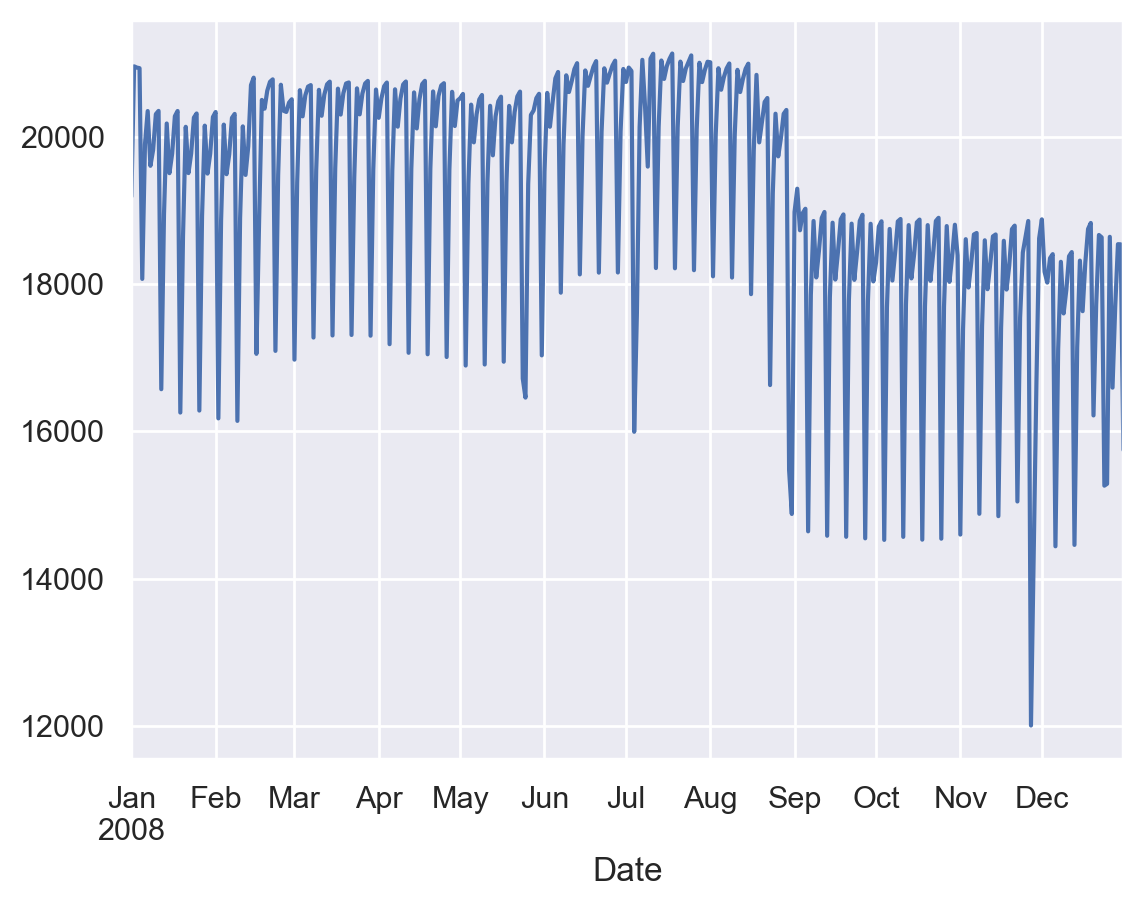

In [11]:
num_flights_by_date.plot();

**Видите ли вы какую-то зависимость по неделям, еженедельную динамику выше? И ниже?**

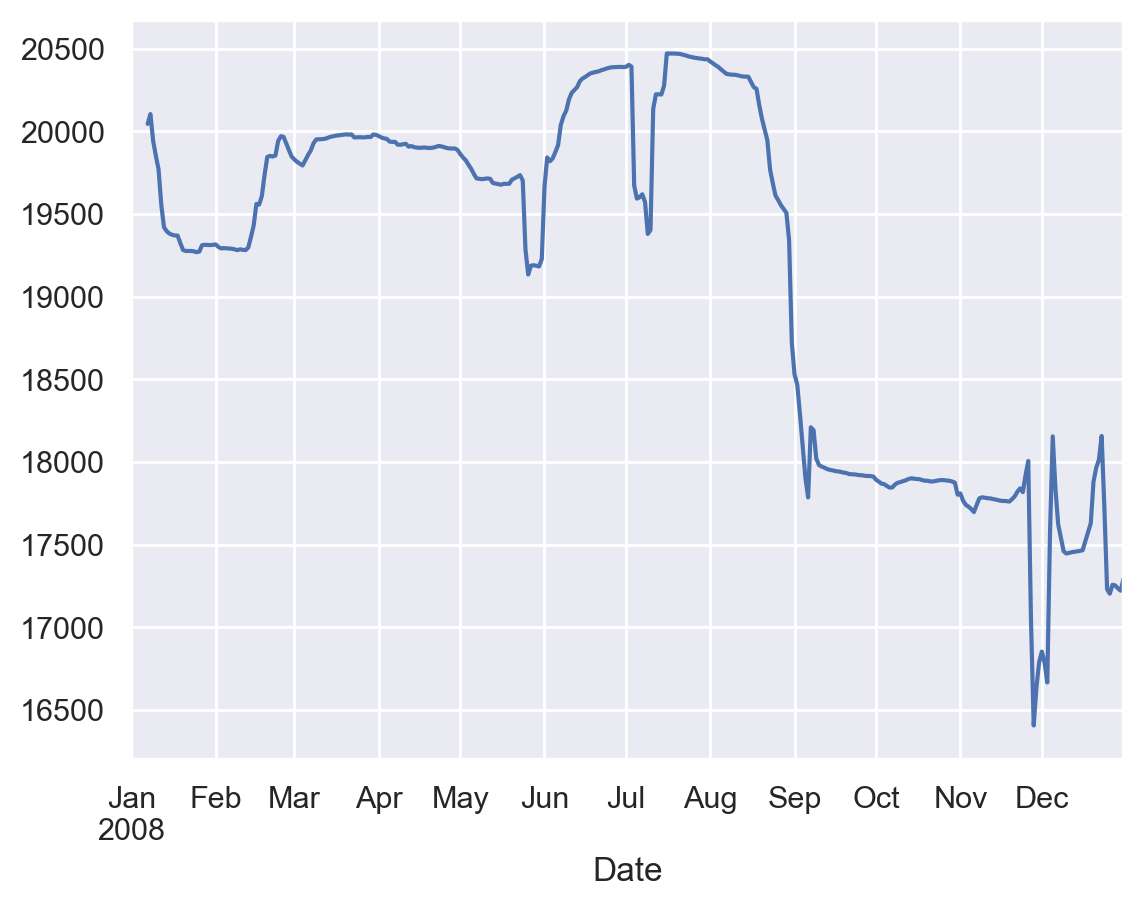

In [12]:
num_flights_by_date.rolling(window=7).mean().plot();

**Нам понадобится новый столбец в нашем наборе данных — час отправления, давайте создадим его.**

Как мы видим, `DepTime` распределяется от 1 до 2400 (оно задаётся в формате `hhmm`, проверьте [описание столбца](https://www.transtats.bts.gov/Fields.asp?Table_ID=236 ) снова). Мы будем рассматривать час отправления как `DepTime` // 100 (разделите на 100 и примените функцию `floor`). Однако теперь у нас будет и час 0, и час 24. Час 24 звучит странно, вместо этого мы установим его равным 0 (типичное несовершенство реальных данных, однако вы можете проверить, что оно влияет только на 521 строку, что вроде ничего страшного). Итак, теперь значения нового столбца `DepHour` будут распределены от 0 до 23. Есть некоторые недостающие значения, пока мы не будем их заполнять, а просто проигнорируем.

In [124]:
flights_df["DepHour"] = flights_df["DepTime"] // 100
flights_df["DepHour"].replace(to_replace=24, value=0, inplace=True)


In [93]:
flights_df["DepHour"].describe()

count    6.873482e+06
mean     1.303737e+01
std      4.789944e+00
min      0.000000e+00
25%      9.000000e+00
50%      1.300000e+01
75%      1.700000e+01
max      2.300000e+01
Name: DepHour, dtype: float64

In [125]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,DepHour
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,...,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,20.0
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,...,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,7.0
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,...,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,6.0
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,...,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,9.0
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,...,515,0,NaN,2.0,0.0,0.0,0.0,32.0,2008-01-03,18.0


# Теперь твоя очередь. Ответить на вопросы ниже.

**<font color='red'>Вопрос 1.</font> Набор данных включает как отмененные, так и завершенные рейсы. Определите, есть ли больше выполненных или отмененных рейсов, и посчитайте числовую разницу между ними.** <br>

- Отмененных рейсов больше, чем выполненных на 329.
- Выполнено рейсов больше отмененных на 6 734 860.
- Отмененные рейсы превышают выполненные на 671.
- Выполнено рейсов больше, чем отменено на 11 088 967.

In [24]:
len(flights_df[flights_df['Cancelled'] == 0])

6872294

In [25]:
len(flights_df[flights_df['Cancelled'] == 1])

137434

In [26]:
compl = len(flights_df[flights_df['Cancelled'] == 0])
cancel = len(flights_df[flights_df['Cancelled'] == 1])

diff = compl-cancel  
print('Выполнено рейсов больше отмененных на ', diff)

Выполнено рейсов больше отмененных на  6734860


**<font color='red'>Вопрос 2.</font> Найдите рейс с наибольшей задержкой вылета и рейс с наибольшей задержкой прибытия. Летят ли они в один аэропорт, и если да, то какой у него код?**

- да, ATL
- да, HNL
- да, MSP
- нет

In [27]:
arr=flights_df.loc[flights_df['ArrDelay'].idxmax()]
dep=flights_df.loc[flights_df['DepDelay'].idxmax()]
arr['Dest']==dep['Dest']

True

In [28]:
arr['Dest']

'MSP'

In [29]:
#Ответ:да,MSP

**<font color='red'>Вопрос 3.</font> Найдите перевозчика, у которого наибольшее количество отмененных рейсов.**

- АА
- MQ
- ВН
- СО

In [15]:
flights_df[flights_df['Cancelled'] == 1].groupby('UniqueCarrier').size().idxmax()

'MQ'

**<font color='red'>Вопрос 4.</font> Давайте рассмотрим время отправления и рассмотрим распределение по часам (столбец `DepHour`, который мы создали ранее). В какой час самый высокий процент рейсов?**<br>

*Подсказка:* Проверьте формат времени [здесь](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ).

- 1 am 
- 5 am  
- 8 am 
- 3 pm 

In [120]:
counts=flights_df['DepHour'].value_counts()
maxh=counts/len(flights_df)*100
print(maxh.idxmax(),'am')

8.0 am


**<font color='red'>Вопрос 5.</font> Хорошо, теперь давайте рассмотрим распределение отмененных рейсов по времени. В какой час наименьший процент отмененных рейсов?**<br>

- 2 am 
- 9 pm  
- 8 am  
- 3 am

In [178]:
flights_df[flights_df['Cancelled'] == 1].groupby('DepHour').size().idxmin()

2.0

**<font color='red'>Вопрос 6.</font> Есть ли какой-нибудь час, в который вообще не было отмененных рейсов? Проверить все, что относится.**

- 3
- 19
- 22
- 4

In [175]:
set(range(24)).difference(flights_df.loc[flights_df["Cancelled"] == 1, "DepHour"].unique())

{3}

**<font color='red'>Вопрос 7.</font> Найдите самый загруженный час или, другими словами, час, когда количество вылетающих рейсов достигает максимума.**<br>

*Подсказка:* Учитывайте только *завершенные* рейсы.

- 4
- 7
- 8
- 17

In [22]:
flights_df[flights_df['Cancelled'] == 0].groupby('DepHour').size().idxmax()

8.0

**<font color='red'>Вопрос 8.</font> Поскольку мы знаем час отправления, было бы интересно изучить среднюю задержку для соответствующего часа. Бывают ли случаи, когда самолеты в среднем вылетали раньше положенного? И если да, то в какое время это произошло?**<br>

*Подсказка:* Учитывайте только *завершенные* рейсы.

- нет, таких случаев не бывает
- да, в 5-6 утра
- да, в 9-10 утра
- да, в 14-16.00

In [156]:
flights_df.groupby('DepHour')['DepDelay'].mean().idxmin()

5.0

In [ ]:
#да, в 5-6 утра

**<font color='red'>Вопрос 9.</font> Учитывая только выполненные перевозчиком рейсы, которые вы нашли в вопросе 3, найдите распределение этих рейсов по часам. В какое время вылетает наибольшее количество самолетов?**<br>

- в полдень
- в 7 утра
- в 8 утра
- в 10 утра

In [153]:
flights_df[flights_df['UniqueCarrier'] == 'MQ'].groupby('DepHour').size().idxmax()

10.0

**<font color='red'>Вопрос 10.</font> Найдите топ-10 перевозчиков по количеству *выполненных* рейсов (столбец _UniqueCarrier_)?**

**Что из перечисленного ниже _нет_ в вашем списке топ-10?**
- DL
- AA
- OO
- EV 

In [26]:
flights_df[flights_df['Cancelled'] == 0].groupby('UniqueCarrier').size().sort_values(ascending=False).iloc[:10]

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
dtype: int64

In [ ]:
#Ответ: EV

**<font color='red'>Вопрос 11.</font> Постройте распределение причин отмены рейса (CancellationCode).**

**Какая наиболее частая причина отмены рейса? (Используйте эту [ссылку](https://www.transtats.bts.gov/Fields.asp?Table_ID=236), чтобы перевести коды в причины)**
- Перевозчик
- Погодные условия
- Национальная воздушная система
- Причины безопасности

In [28]:
flights_df[flights_df['Cancelled'] == 1]['CancellationCode'].value_counts().idxmax()

'B'

In [ ]:
#Погодные условия

**<font color='red'>Вопрос 12.</font> Какой маршрут наиболее частый по количеству рейсов?**

(Обратите внимание на столбцы _'Origin'_ и _'Dest'_. Рассматривайте направления _A->B_ и _B->A_ как _разные_ маршруты)

  - Нью-Йорк – Вашингтон (JFK-IAD)
  - Сан-Франциско – Лос-Анджелес (SFO-LAX)
  - Сан-Хосе – Даллас (SJC-DFW)
  - Нью-Йорк – Сан-Франциско (JFK-SFO)

In [31]:
flights_df.groupby(['Dest','Origin'])['FlightNum'].size().idxmax()

('LAX', 'SFO')

In [ ]:
#Сан-Франциско – Лос-Анджелес (SFO-LAX)

**<font color='red'>Вопрос 13.</font> . Найдите топ-5 задержанных маршрутов (посчитайте, сколько раз они задерживались при отправлении). Из всех рейсов по этим 5 маршрутам посчитайте все рейсы, погодные условия которых способствовали задержке.**

_Подсказка_: учитывайте только положительные задержки

- 449
- 539
- 549
- 668

In [141]:
delays=flights_df[flights_df['DepDelay'] > 0]

In [142]:
top_del=delays.groupby(['Origin', 'Dest']).size().sort_values(ascending=False).iloc[:5]

In [146]:
fl_delays = delays[delays.set_index(['Origin', 'Dest']).index.isin(top_del.index)]

In [152]:
len(fl_delays[fl_delays["WeatherDelay"] > 0])

668

**<font color='red'>Вопрос 14.</font> Изучите почасовое распределение времени отправления. Выберите все верные утверждения:**

  - Рейсы равномерно распределены во временном интервале [0-23].
  - В период с 0 до 4 утра рейсов значительно меньше, чем с 19:00 до 20:00.

In [40]:
flights_df['DepHour'].value_counts().sort_index()

DepHour
0.0      20368
1.0       5861
2.0       1851
3.0        833
4.0       3390
5.0     148167
6.0     446737
7.0     436700
8.0     449224
9.0     434850
10.0    431460
11.0    444702
12.0    424249
13.0    435917
14.0    416875
15.0    411126
16.0    434017
17.0    432488
18.0    400784
19.0    387288
20.0    285991
21.0    254850
22.0    119651
23.0     46103
Name: count, dtype: int64

In [ ]:
#В период с 0 до 4 утра рейсов значительно меньше, чем с 19:00 до 20:00.

**<font color='red'>Вопрос 15.</font> Покажите, как количество рейсов меняется со временем (ежедневно/еженедельно/ежемесячно) и интерпретируйте полученные результаты.**

**Выберите все правильные утверждения:**
- Количество рейсов в выходные дни меньше, чем в будние (рабочие дни).
- Наименьшее количество рейсов приходится на воскресенье.
- Зимой рейсов меньше, чем летом.

_Подсказка_: ищите официальные метеорологические зимние месяцы для Северного полушария.

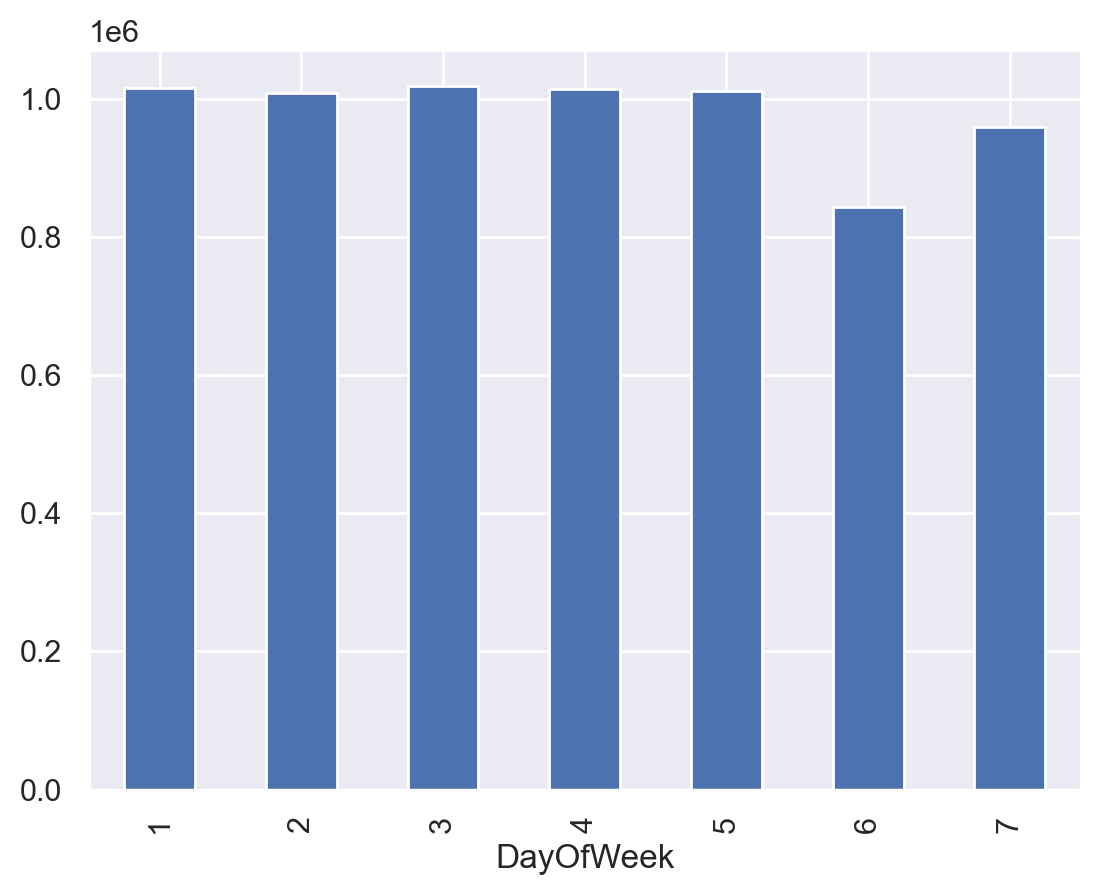

In [174]:
num_flights_by_day_of_week = (
    flights_df[flights_df["Cancelled"] == 0].groupby("DayOfWeek").size()
)
num_flights_by_day_of_week.plot(kind="bar");

In [ ]:
#Количество рейсов в выходные дни меньше, чем в будние (рабочие дни).

**<font color='red'>Вопрос 16.</font> Изучите распределение причин отмены во времени. Составьте диаграмму причин отмены, агрегированных по месяцам.**

**Выберите все правильные утверждения:**
- В октябре наименьшее количество отмен из-за погоды. 
- Наибольшее количество отмен в сентябре связано с соображениями безопасности.
- Основная причина отмены рейсов в апреле – операторы связи.
- Отмены рейсов по вине Национальной воздушной системы происходят чаще, чем по вине перевозчиков.

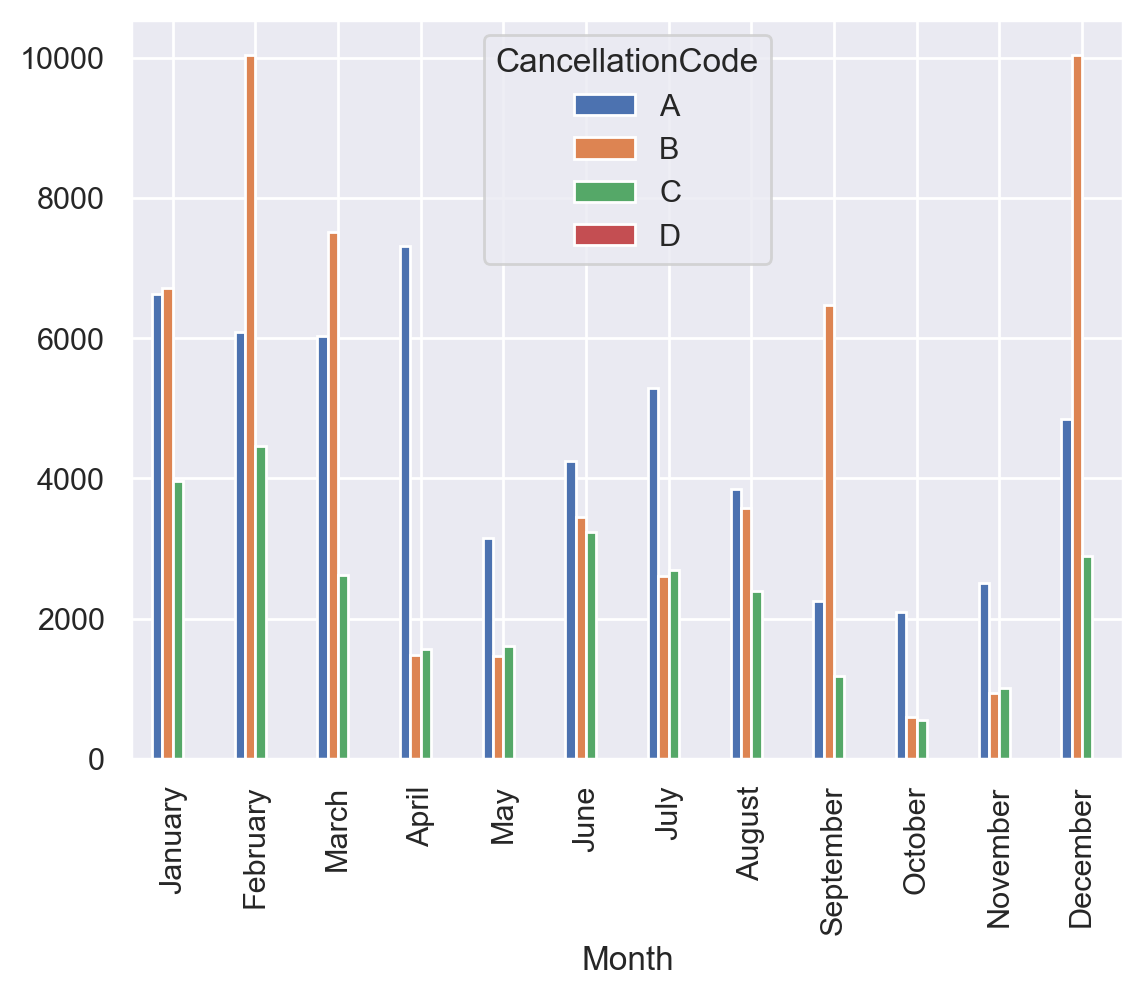

In [173]:
import calendar

month_names = []

for month_idx in flights_df["Month"].unique():
    month_names.append(calendar.month_name[month_idx])

ax = flights_df.groupby(["Month", "CancellationCode"]).size().unstack().plot(kind="bar")

ax.set_xticklabels(month_names, rotation=90)
plt.show()

**<font color='red'>Вопрос 17.</font> В каком месяце происходит наибольшее количество отмен по вине Carrier?**

- Май
- Январь
- Сентябрь
- Апрель

In [135]:
flights_df[flights_df['CancellationCode'] == 'A'].groupby('Month').size()

Month
1     6635
2     6090
3     6038
4     7312
5     3157
6     4251
7     5292
8     3852
9     2246
10    2097
11    2510
12    4850
dtype: int64

In [ ]:
#Апрель

**<font color='red'>Вопрос 18.</font> Определите перевозчика с наибольшим количеством отмен из-за перевозчика в соответствующем месяце из предыдущего вопроса.**

- 9E
- EV
- HA
- AA

In [140]:
flights_df[flights_df['CancellationCode'] == 'A'].groupby('UniqueCarrier').size().idxmax()

'AA'